<a href="https://colab.research.google.com/github/DanielSantosSouza/Data-Science/blob/main/Analisando_os_Dados_do_Airbnb_New_York.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *New York*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade New York, e ver quais insights podem ser extraídos a partir de dados brutos.**

New Iork é a cidade mais populosa não só do Estado de New Yok, mas também dos Estados Unidos. A cidade de New York é composta por cinco burgos que iremos aqui chama-los de regiões. New York é uma cidade cosmopolita principalmente por ser o centro financeiro dos Estados Unidos. Por esse motivo, a cidade todos os anos recebe milhares de turistas que se hospedam em hotéis ou melhor, alugam imóveis por temporada. E o Airbnb oferece uma plataforma que conecta as pessoas que querem alugar um imóvel e os anfitriões que desejam alugar seus imóveis. Este projeto tem por objetivo analisar os dados do Airbnb para a cidade de New York.


## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2021-09-01/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id`: id do imóvel;
* `name`: Nome do anúncio do imóvel;
* `host_id`: id do anfitrião;
* `host_name`: Nome do anfitrião;
* `neighbourhood_group`: Nome da região;
* `neighborhood`: Nome do bairro;
* `latitude`: Coordenada geográfica do imóvel;
* `longitude`: Coordenada geográfica do imóvel;
* `room_type`: Tipo do imóvel;
* `price`: Preço de aluguel do imóvel;
* `minimum_nights`: Quantidade de noites mínimas;
* `number_of_reviews`: Quantidade de reviews;
* `last_reviews`: Data do último review;
* `reviews_per_month`: Quantidade de reviews por mês;
* `calculated_host_listings_count`: Quantidade de imóveis do anfitrião;
* `availability_365`: Quantidade de dias disponíveis em 365 dias;
* `license`: Não possui valor válido


In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.33,3,340,0,NaN
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,76,1,408,2021-06-29,5.03,1,208,58,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2016-06-05,0.54,1,365,0,NaN
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,2021-08-08,0.02,1,204,1,NaN
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,490,2021-08-14,3.64,1,243,17,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame

print("Quantidade de variáveis: {}".format(df.shape[1]))

print("Quantidade de entradas: {}\n".format(df.shape[0]))

df.dtypes

Quantidade de variáveis: 18
Quantidade de entradas: 36923



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Como já mencionado, a variável `license` não possui nenhum valor válido. As variáveis `reviews_per_month` e `last_review` possuem 25% dos seus valores ausentes. As variáveis `host_name` e `name` possuem uma pequena quantidade não representativa.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum().sort_values(ascending = False) / df.shape[0]) * 100

license                           100.000000
reviews_per_month                  25.176719
last_review                        25.176719
host_name                           0.300626
name                                0.035208
longitude                           0.000000
host_id                             0.000000
neighbourhood_group                 0.000000
neighbourhood                       0.000000
latitude                            0.000000
room_type                           0.000000
number_of_reviews_ltm               0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

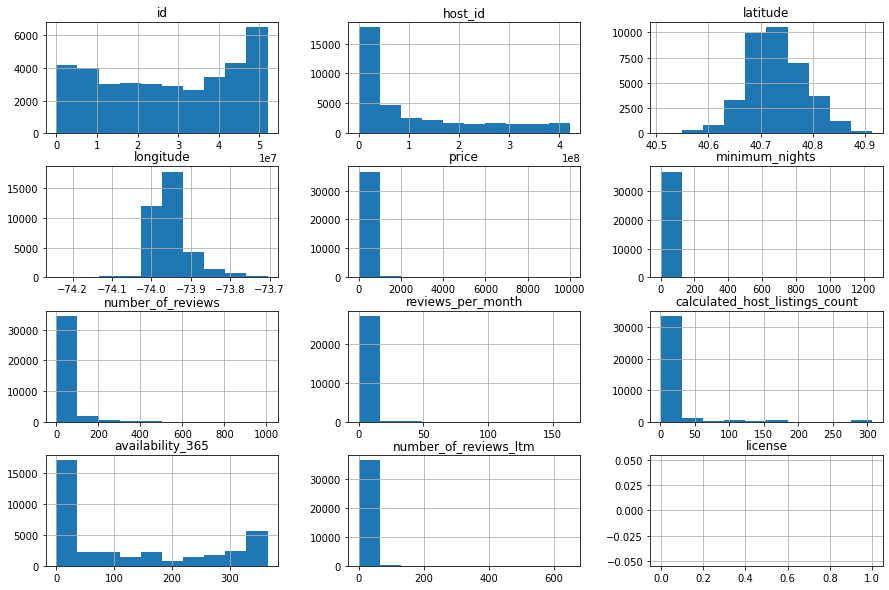

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 10, figsize = (15,10));

Atráves da distribuição do histograma plotado acima, podemos identificar possíveis outliers em cada variável. Dessa forma, as variáveis `price`, `minimum nights`, `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count` e `number_of_reviews_ltm` possuem possíveis outliers. Iremos constatar através do método `describe()`.

In [ ]:
#Identifcação de outliers nas variáveis listadas acima.

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm
count,36923.000000,36923.000000,36923.000000,27627.000000,36923.000000,36923.000000
mean,169.186009,22.593885,22.986350,1.452372,13.590743,4.056550
std,299.117445,29.999673,49.393115,4.047668,45.119156,13.919655
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,70.000000,3.000000,0.000000,0.110000,1.000000,0.000000
50%,110.000000,30.000000,4.000000,0.440000,1.000000,0.000000
75%,184.000000,30.000000,19.500000,1.510000,3.000000,2.000000
max,10000.000000,1250.000000,1006.000000,163.190000,307.000000,650.000000


* `price`: Para a variável `price`, 75% dos imóveis possuem um valor de até 184 dolares. Para a mesma variável temos um máximo de 10000 dolares confirmando assim a presença de outliers. 
* `minimum_nights`: Para a variável `minimum_nights`, 50% dos imóveis possuem uma quantidade mínima de até 30 noites.

Atráves do boxplot para a variável temos mais uma confirmação da presença de outliers na variável `price` e `minimun_nights`.

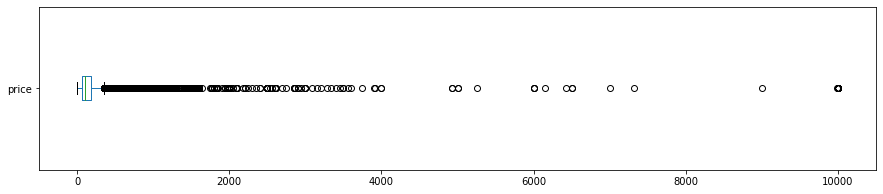

In [ ]:
df["price"].plot(kind = "box", vert = False, figsize = (15,3));

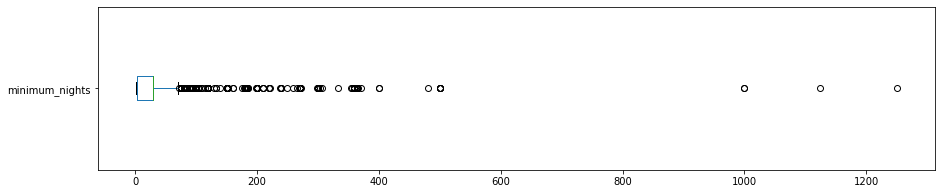

In [ ]:
df['minimum_nights'].plot(kind = "box", vert = False, figsize = (15,3));

Após identificação da presença de outliers, iremos agora realizar o tratamento adequado.

In [ ]:
#Determinando o range na variável `price` para tratarmos os outliers.
print("price - Valores acima de 1000")
print('Quantidade de entradas acima de 1000: {}'.format(df.loc[df['price'] > 1000].shape[0]))
print('Representatividade dos valores acima de 1000: {:.2f}%\n'.format((df.loc[df['price'] > 1000].shape[0] / df.shape[0]) * 100))

#Determinando o range na variável `minimun_nights` para tratarmos os outliers.
print("minimum_nights - Valores acima de 100")
print('Quantidade de entradas acima de 100: {}'.format(df.loc[df['minimum_nights'] > 100].shape[0]))
print('Representatividade dos valores acima de 100: {:.2f}%'.format((df.loc[df['minimum_nights'] > 100].shape[0] / df.shape[0]) * 100))

#Eliminando as entradas com os outliers 
#df.drop()

df.drop(df[df['price'] > 1000].index, axis = 0, inplace = True)

df.drop(df[df['minimum_nights'] > 100].index, axis = 0, inplace = True)

price - Valores acima de 1000
Quantidade de entradas acima de 1000: 363
Representatividade dos valores acima de 1000: 0.98%

minimum_nights - Valores acima de 100
Quantidade de entradas acima de 100: 359
Representatividade dos valores acima de 100: 0.97%


Após identificação dos outliers nas duas variáveis, iremos agora mostrar as ditribuição das mesmas após tratamento.

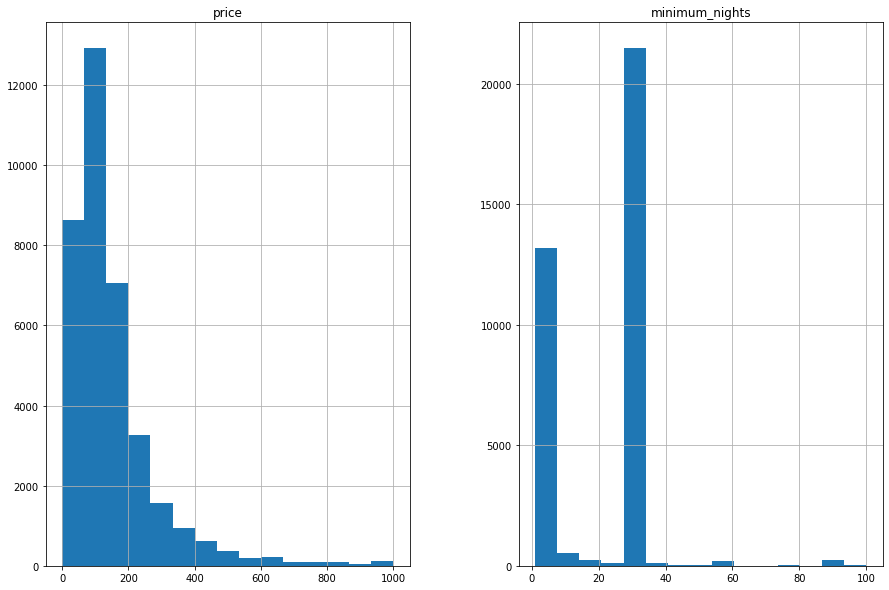

In [ ]:
df[['price', 'minimum_nights']].hist(bins = 15, figsize = (15, 10));

### **Q4. Qual a média dos preços de aluguel?**

Iremos agora analisar a média de preços de aluguel por bairro e região.

In [ ]:
# Os 5 neighbourhood_group com as maiores médias de preço de aluguel
df.groupby(['neighbourhood_group'])['price'].mean().sort_values(ascending = False)[:5]

neighbourhood_group
Manhattan        184.025696
Brooklyn         132.115197
Staten Island    116.248387
Queens           103.623371
Bronx            102.144118
Name: price, dtype: float64

In [ ]:
# Os 5 neighbourhood com as maiores médias de preço de aluguel
df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending = False)[:5]

neighbourhood
Fort Wadsworth    800.000000
Prince's Bay      397.500000
Tottenville       389.000000
Tribeca           323.164384
Willowbrook       309.000000
Name: price, dtype: float64

In [ ]:
df.groupby(by = ['neighbourhood_group', 'neighbourhood'])['price'].mean().sort_values(ascending = False)[:5]

neighbourhood_group  neighbourhood 
Staten Island        Fort Wadsworth    800.000000
                     Prince's Bay      397.500000
                     Tottenville       389.000000
Manhattan            Tribeca           323.164384
Staten Island        Willowbrook       309.000000
Name: price, dtype: float64

Quando verificamos a média de aluguel por região, constatamos que Manhattan é a região de New York com maior preço médio de aluguel. Quando verificamos o preço médio por bairro, verificamos que as maiores médias de aluguél concentram-se em Staten Island e não em Manhattan.

Vamos verificar a quantidade de entradas para Manhattan e Staten Island.

In [ ]:
print("Quantidade de imóveis em Manhattan: {}".format(df[df['neighbourhood_group'] == 'Manhattan'].shape[0]))
print("Quantidade de imóveis em Manhattan: {}".format(df[df['neighbourhood_group'] == 'Staten Island'].shape[0]))

Quantidade de imóveis em Manhattan: 15800
Quantidade de imóveis em Manhattan: 310


In [ ]:
df[df['neighbourhood_group'] == 'Staten Island']['price'].describe()

count    310.000000
mean     116.248387
std      107.122678
min       10.000000
25%       62.000000
50%       90.000000
75%      135.000000
max      850.000000
Name: price, dtype: float64

In [ ]:
df[df['neighbourhood_group'] == 'Manhattan']['price'].describe()

count    15800.000000
mean       184.025696
std        149.136890
min          0.000000
25%         90.000000
50%        145.000000
75%        215.000000
max       1000.000000
Name: price, dtype: float64

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.075944,-0.049396,0.016562,0.049932,0.143295
minimum_nights,-0.075944,1.000000,-0.250180,-0.279261,0.143404,-0.134331
number_of_reviews,-0.049396,-0.250180,1.000000,0.312228,-0.105685,0.118635
reviews_per_month,0.016562,-0.279261,0.312228,1.000000,-0.003339,0.131896
calculated_host_listings_count,0.049932,0.143404,-0.105685,-0.003339,1.000000,0.222569
availability_365,0.143295,-0.134331,0.118635,0.131896,0.222569,1.000000


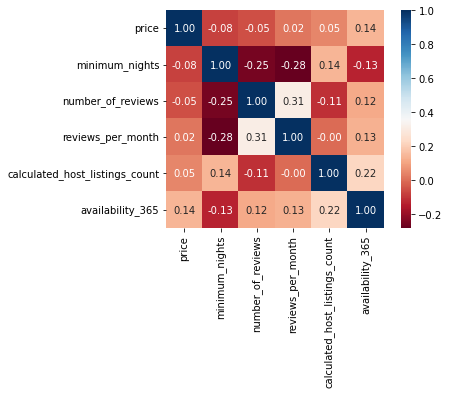

In [ ]:
# plotar um heatmap a partir das correlações
sn.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df['room_type'].value_counts()

Entire home/apt    19226
Private room       16161
Shared room          569
Hotel room           253
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df['room_type'].value_counts() / df.shape[0]) * 100

Entire home/apt    53.097296
Private room       44.632550
Shared room         1.571433
Hotel room          0.698721
Name: room_type, dtype: float64

In [ ]:
df['room_type'].value_counts()

Conforme verificado acima, metade dos imóveis disponíveis no Airbnb são para a alugar todo o imóvel.

### **Q6. Qual a localidade mais cara do dataset?**



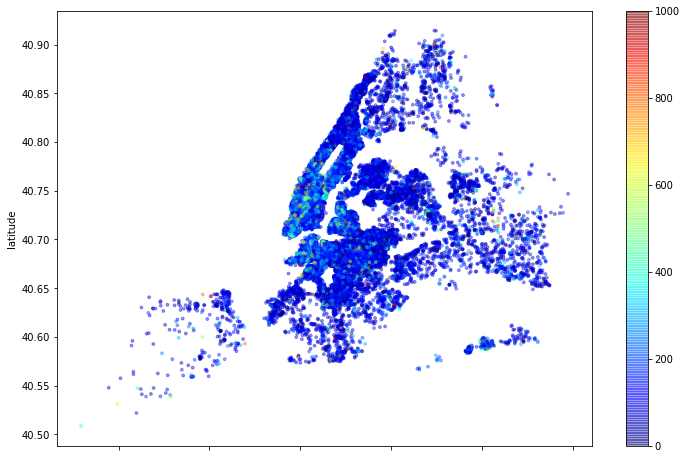

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df.groupby(['neighbourhood_group'])['minimum_nights'].mean().sort_values(ascending = False)[:5]

neighbourhood_group
Manhattan        21.985190
Brooklyn         20.304581
Queens           17.672842
Bronx            13.613725
Staten Island    11.729032
Name: minimum_nights, dtype: float64

In [ ]:
df[df['neighbourhood_group'] == 'Staten Island']['minimum_nights'].describe()

count    310.000000
mean      11.729032
std       13.657773
min        1.000000
25%        2.000000
50%        3.000000
75%       30.000000
max       90.000000
Name: minimum_nights, dtype: float64

In [ ]:
df[df['neighbourhood_group'] == 'Manhattan']['minimum_nights'].describe()

count    15800.000000
mean        21.985190
std         14.291909
min          1.000000
25%          4.000000
50%         30.000000
75%         30.000000
max        100.000000
Name: minimum_nights, dtype: float64

In [ ]:
#Determinando a média de noites mínimas a cidade de New York
df['minimum_nights'].mean()

20.419011847883123

In [ ]:
#Comparação do valor para a média de noites mínimas da cidade de New York
df[df['minimum_nights'] > 24.4190].groupby(['neighbourhood_group'])['price'].mean().sort_values(ascending = False)[:5]

neighbourhood_group
Manhattan        173.875912
Brooklyn         121.711706
Staten Island    120.412371
Queens            92.896632
Bronx             90.035714
Name: price, dtype: float64

## Conclusões


Através da análise dos dados do Airbnb da cidade de New York, verificamos que havia a presença de outliers em algumas colunas, por isso, foi realizado o tratamento necessário para a análise através da limpeza desses dados.  

Constatamos que a região da cidade de New York com a maior média do preço de aluguel é Manhattan, seguido por Brooklyn e Staten Island. Ao analisarmos a média do preço do aluguel por bairro, verificamos que os bairros presentes no  ranking dos cinco maiores preços de aluguel são da região de Staten Island e não de Manhattan. Isso deve-se a diferença da quantidade de entradas para as duas regiões. Enquanto Manhattan possui cerca de 15800 entradas, Staten Island possui cerca de 310 entradas e alguns imóveis com um preço alto, o que desloca a média pra cima. 

Quando comparamos média de noites mínimas para as duas regiões, A região de Manhattan possui uma média maior que Staten Island. O que era de se esperar, pois Manhattan é uma cidade turística e centro financeiro dos Estados Unidos. Além disso, quando comparamos o valor do aluguel para a média de noites mínimas da cidade de New York, Manhattan é a região com maior preço.

Observamos que não há uma correlação relevante entre as variáveis.